In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('../')

from processes import MovingAverage

# The Moving Average Process

We define the moving average process as:

$Y_t = e_t + \sum_{i=1}^p \theta_i e_{t-i}$

In other words, for an order $p$ moving average process, the output at time $t$ is a weighted sum of the values $e_t$ through $e_{t-p}$

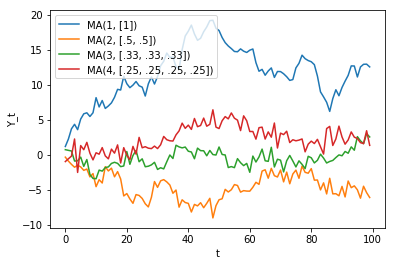

In [25]:
plt.figure()

ma1 = MovingAverage(1, [1])
ma2 = MovingAverage(2, [.5, .5])
ma3 = MovingAverage(3, [.33, .33, .33])
ma4 = MovingAverage(4, [.25, .25, .25, .25])

xs = [i for i in range(100)]

y1s = [ma1.step() for _ in xs]
y2s = [ma2.step() for _ in xs]
y3s = [ma3.step() for _ in xs]
y4s = [ma4.step() for _ in xs]

plt.plot(xs, y1s, label='MA(1, [1])')
plt.plot(xs, y2s, label='MA(2, [.5, .5])')
plt.plot(xs, y3s, label='MA(3, [.33, .33, .33])')
plt.plot(xs, y4s, label='MA(4, [.25, .25, .25, .25])')

plt.xlabel('t')
plt.ylabel('Y_t')
plt.legend()
plt.show()

### What is the effect of the coefficients on the variance?

\begin{align}
    \mathbb V[MA(p)] &= \mathbb V\bigg[e_t + \sum_{i=1}^p \theta_ie_{t-i}\bigg]\\
    &= \sigma^2 + \sum_{i=1}^p \theta_i^2 V[e_{t-i}]\\
    &= \sigma^2 + \sum_{i=1}^p \theta_i^2 \sigma^2\\
    &= \sigma^2 + \sigma^2 \sum_{i=1}^p \theta_i^2 \\
    &= \sigma^2 \bigg( 1 +  \sum_{i=1}^p \theta_i^2 \bigg) \\
\end{align}

Variance increases linearly with the sum of the squares of the coefficients! 

### Is it (weakly) stationay?

Condition 1: Expectation is independent of $t$
\begin{align*}
    \mathbb E[MA(p)] &= E\bigg[e_t + \sum_{i=1}^p \theta_i e_{t-i}\bigg]\\
    &= 0 + \sum_{i=1}^p \theta_i \mathbb E[e_{t-i}]\\
    &= 0 + \sum_{i=1}^p \theta_i (0)\\
    &= 0\\
\end{align*}

Condition 2: Variance is finite and intependent of $t$

Follows if $\sum_{i=1}^p \theta^2_i < \infty$

Condition 3: Covariance is independent of time
\begin{align*}
    \mathbb C[Y_t, Y_{t+k}] &= \mathbb C \bigg[e_t + \sum_{i=1}^p \theta_i e_{t-i}, e_{t+k} + \sum_{i=1}^p \theta_i e_{t+k-i} \bigg]\\
    &= \mathbb C [e_t, e_{t+k}]\\
    &+ \mathbb C \bigg[e_t, \sum_{i=1}^p \theta_i e_{t+k-i}\bigg]\\
    &+ \mathbb C \bigg[\sum_{i=1}^p \theta_i e_{t-i}, e_{t+k}\bigg]\\
    &+ \mathbb C \bigg[\sum_{i=1}^p \theta_i e_{t-i}, \sum_{i=1}^p \theta_i e_{t+k-i}\bigg]\\
    \\
    &= \sum_{i=1}^p \theta_i \mathbb C \bigg[e_t, e_{t+k-i}\bigg]\\
    &+ \sum_{i=1}^p \theta_i \mathbb C \bigg[ e_{t-i}, e_{t+k}\bigg]\\
    &+ \sum_{i=1}^p \sum_{j=1}^p \theta_i \theta_j \mathbb C \bigg[e_{t-i}, e_{t+k-j}\bigg]\\
    \\
    &= \theta_k \sigma^2 \mathbb 1_{p >= k} + \sum_{i=1}^p \sum_{j=1}^p \theta_i \theta_j \sigma^2 \mathbb 1_{t-i = t+k-j}\\
    &= \theta_k \sigma^2 \mathbb 1_{p >= k} + \sum_{i=1}^p \sum_{j=1}^p \theta_i \theta_j \sigma^2 \mathbb 1_{i = j-k}\\
\end{align*}
Which is independent of $t$!

#### Thus, MA(p) processes are (weakly) stationary!

### The AutoCovariance Function

$$\theta_k \sigma^2 \mathbb 1_{p >= k} + \sum_{i=1}^p \sum_{j=1}^p \theta_i \theta_j \sigma^2 \mathbb 1_{i = j-k}$$